# Trends with Baby Names Between 1880 to 2016
An analysis by Johnny Hayes

## I. Introduction
In this report we are given the data set which contains the names of new born babies for each year between 1880 to 2016. The goal of this report is to extract some interesting behavior from our data. There isn't much background to elaborate on for this data set since, well, we all have names and understand their function. That being said we will use techniques to pull apart the data and get some insight on trends. In the report I will be looking at the data for predominantely male names becoming female names and vice versa. I also with look at the popularity of all the names and see how they compare to the total amount of names. 

In [23]:
from glob import glob 
import numpy as np 
data_set = sorted(glob('names/yob*.txt') )
years = len(data_set)
def year(x): 
    return int(x[-8:-4]) # gives us the year of the file we are working with
firstyear = year(data_set[0])

data = {}
gender_data = {'F':0,'M':1} 
for file in data_set:
    f = open(file) 
    lines = f.read().split('\n') # separates the string into a list 
    for line in lines:
        if len(line)==0: 
            continue # ignore empty lines

        
        name,gender,count = line.split(',') # now splits the elements in the list into three separate variables
        count = int(count) 
        
        # add new names 
        if name not in data:
            data[name] = np.zeros((2,years),dtype=int)

        # adds to the number of people with the same name
        data[name][ gender_data[gender], year(file)-firstyear] = count
    f.close()
    
%pylab inline #access matplotlib facilities 


Populating the interactive namespace from numpy and matplotlib


C:\Users\ProBook\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


What the above code block does is take the folder of baby names and for each year it counts the amount of babies with a certain name. We can access the names in the folder by using the glob package and from there we do basic data extraction. We use a dictionary so we can use the name as a key that is associated with the number of people with that name. We also want to know if the person in question is a male or female so we have a dictionary for that as well. Now with the data precisely packaged, we can analyze it, which starts with just trying out some names. 

## II. Testing Various Names

I'll start with my name.

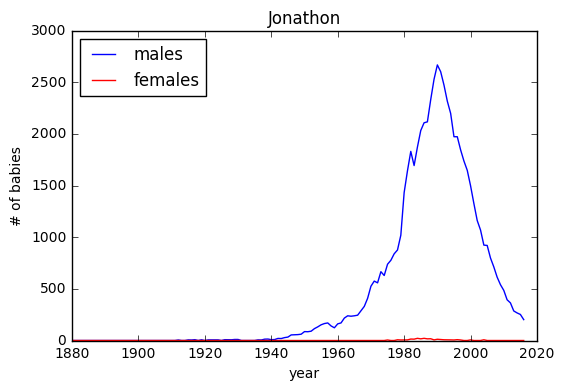

In [31]:
name = 'Jonathon'
plot( range(firstyear,year(data_set[-1])+1)   ,data[name][1] ,'b') 
plot( range(firstyear,year(data_set[-1])+1)   ,data[name][0] ,'r')
title('Jonathon')
xlabel('year')
ylabel('# of babies')
legend(['males','females'],loc =0)

It's always weird to see feamles with a 'male' name, which seems to happen with a lot of names. One thing I noticed is that I spell my name a little differently then the normal way which produces.

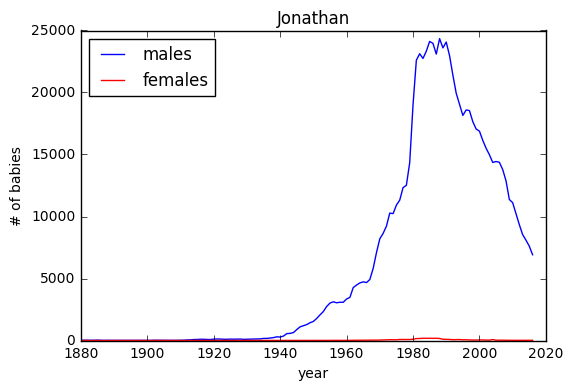

In [32]:
name = 'Jonathan'
plot( range(firstyear,year(data_set[-1])+1)   ,data[name][1] ,'b') 
plot( range(firstyear,year(data_set[-1])+1)   ,data[name][0] ,'r')
title('Jonathan')
xlabel('year')
ylabel('# of babies')
legend(['males','females'],loc =0)

As you can see, this way of spelling it is considerably more common. After some research, the variation 'Jonathon' actually appeared in the US in the year 1946 which lines up with our data. Let's look at a few more.

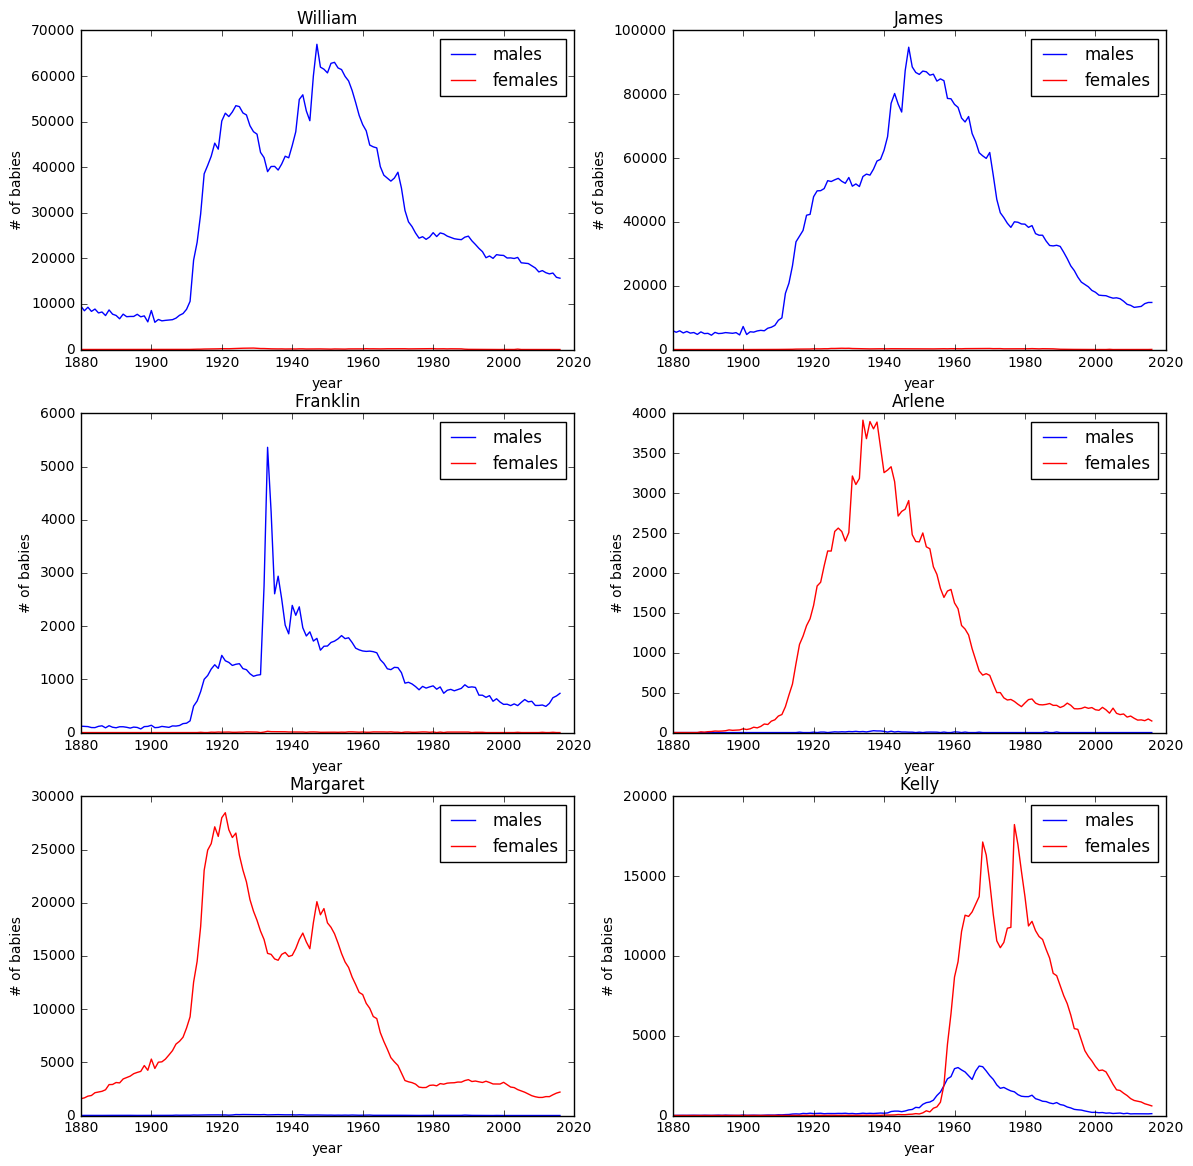

In [33]:
name1 = 'William'
name2 = 'James'
name3 = 'Franklin'
name4 = 'Arlene'
name5 = 'Margaret'
name6 = 'Kelly'

figure(figsize=(14,14))
subplot(3,2,1)
plot( range(firstyear,year(data_set[-1])+1)   ,data[name1][1] ,'b') 
plot( range(firstyear,year(data_set[-1])+1)   ,data[name1][0] ,'r')
title('William')
xlabel('year')
ylabel('# of babies')
legend(['males','females'],loc =0)
subplot(3,2,2)
plot( range(firstyear,year(data_set[-1])+1)   ,data[name2][1] ,'b') 
plot( range(firstyear,year(data_set[-1])+1)   ,data[name2][0] ,'r')
title('James')
xlabel('year')
ylabel('# of babies')
legend(['males','females'],loc =0)
subplot(3,2,3)
plot( range(firstyear,year(data_set[-1])+1)   ,data[name3][1] ,'b') 
plot( range(firstyear,year(data_set[-1])+1)   ,data[name3][0] ,'r')
title('Franklin')
xlabel('year')
ylabel('# of babies')
legend(['males','females'],loc =0)
subplot(3,2,4)
plot( range(firstyear,year(data_set[-1])+1)   ,data[name4][1] ,'b') 
plot( range(firstyear,year(data_set[-1])+1)   ,data[name4][0] ,'r')
title('Arlene')
xlabel('year')
ylabel('# of babies')
legend(['males','females'],loc =0)
subplot(3,2,5)
plot( range(firstyear,year(data_set[-1])+1)   ,data[name5][1] ,'b') 
plot( range(firstyear,year(data_set[-1])+1)   ,data[name5][0] ,'r')
title('Margaret')
xlabel('year')
ylabel('# of babies')
legend(['males','females'],loc =0)
subplot(3,2,6)
plot( range(firstyear,year(data_set[-1])+1)   ,data[name6][1] ,'b') 
plot( range(firstyear,year(data_set[-1])+1)   ,data[name6][0] ,'r')
title('Kelly')
xlabel('year')
ylabel('# of babies')
legend(['males','females'],loc =0)

The general trend seems to be that the name garners popularity for a span of a few years, roughly 10, then drops off pretty drastically. Looking at the last plot, we see that the name "Kelly" went from a mostly male name to a female name. If we were to take the ratio of the female names to male names we would be able to see when/ if the name 'changes' from one sex to another. 

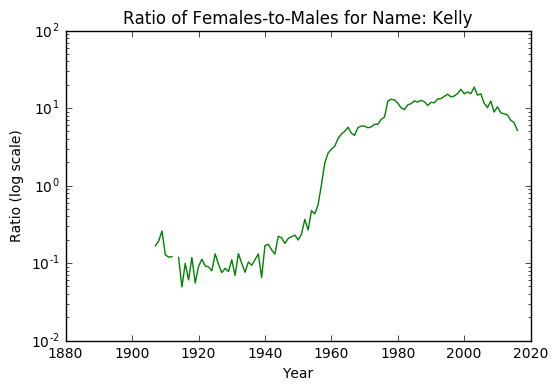

In [48]:
name = 'Kelly'
semilogy( range(firstyear,year(data_set[-1])+1)   ,data[name][0]/(data[name][1] + 1) ,'g');
title('Ratio of Females-to-Males for Name: '+ name)
xlabel('Year')
ylabel('Ratio (log scale)')

with this we can try to find every name that changed from predominately male to female. 

## III. Name Popularity Changing Genders

We'll have to loop through every name in our data set.

In [116]:
name_list1 = []
for names in data:
    yup = False
    ratios = data[names][0]/ (data[names][1] + 1)
    for i in range(1,len(ratios) ):
        if ratios[i - 1] < 1 and ratios[i] >= 1 and ratios[i - 1] != 0: #the inflection point
            yup = True
            break
    if yup == True:
        name_list1.append(names)
print(name_list1)
print("Number of names that have changed from male to female dominant", len(name_list))

['Curlee', 'Ercel', 'Kym', 'Almer', 'Richie', 'Shalom', 'Beryl', 'Karlin', 'Tonie', 'Dayan', 'Kelly', 'Ova', 'Cyan', 'Kemani', 'Clois', 'Mylin', 'Karrington', 'Kamani', 'Plumer', 'Mauri', 'Linn', 'Shaheen', 'Daryn', 'Ronda', 'Tagen', 'Clair', 'Ivie', 'Brylin', 'Cire', 'Scottie', 'Milan', 'Amel', 'Cobie', 'Amaree', 'Mckinley', 'Li', 'Emanuelle', 'Codi', 'Jody', 'Lavell', 'Pearley', 'Anjel', 'Jonnie', 'Gayl', 'Da', 'Tal', 'Keylin', 'Donyel', 'Jream', 'Min', 'Alexi', 'Nate', 'Kerrington', 'Weslie', 'Daylin', 'Shelly', 'Ainsley', 'Tru', 'Kekeli', 'Armahni', 'Carlin', 'Zaide', 'Romaine', 'Lugene', 'Armanii', 'Jin', 'Truc', 'Bunnie', 'Kameron', 'Ilia', 'Divine', 'Ravon', 'Sherrill', 'Gerry', 'Vernie', 'Tylee', 'Shey', 'Chawn', 'Chi', 'Brier', 'Duanne', 'Justice', 'Lanier', 'Ajai', 'Callaway', 'Evon', 'Charley', 'Shiva', 'Hollis', 'Peyson', 'Perle', 'Seneca', 'Natale', 'Leigh', 'Kenyata', 'Ravin', 'Rossie', 'Mayan', 'Chai', 'Bird', 'Navi', 'Dorie', 'Riley', 'Kirby', 'Loghan', 'Rhythm', 'Cam',

To explain the code block, first I generate an array of the ratio between the given name for females and males. Next, I iterate through the list and check to see if the ratio goes from less than 1 to equal to or greater than 1. Once I find a truth value there I break the loop and add the name to a list to return at the end. There are some cases where the name actually goes back to male, but I really just wanted the data of names that had that inflection point. Next we just modify the code to check females names that change to male dominant names. 

In [117]:
name_list2 = []
for names in data:
    yup = False
    ratios = data[names][1]/ (data[names][0] + 1)
    for i in range(1,len(ratios) ):
        if ratios[i - 1] < 1 and ratios[i] >= 1 and ratios[i - 1] != 0: #the inflection point
            yup = True
            break
    if yup == True:
        name_list2.append(names)
print(name_list2)
print("Number of names that have changed from female to male dominant", len(name_list))

['Zi', 'Curlee', 'Ercel', 'Boluwatife', 'Lawsyn', 'Almer', 'Sony', 'Richie', 'Shalom', 'Karlin', 'Meba', 'Dayan', 'Ova', 'Exodus', 'Cyan', 'Kemani', 'Clois', 'Mylin', 'Bristol', 'Karrington', 'Kamani', 'Plumer', 'Eron', 'Mauri', 'Linn', 'Shaheen', 'Daryn', 'Tagen', 'Dorin', 'Ivie', 'Brylin', 'Shade', 'Cire', 'Johnie', 'Scottie', 'Milan', 'Amel', 'Cobie', 'Amaree', 'Mckinley', 'Verble', 'Li', 'Neylan', 'Emanuelle', 'Codi', 'Jody', 'Lavell', 'Pearley', 'Anjel', 'Jonnie', 'Carle', 'Da', 'Tal', 'Keylin', 'Donyel', 'Gray', 'Min', 'Deaveon', 'Alexi', 'Nate', 'Zhi', 'Rollins', 'Weslie', 'Daylin', 'Lyan', 'Finnlee', 'Tru', 'Lundy', 'Yichen', 'Carlin', 'Zaide', 'Romaine', 'Lugene', 'Callaghan', 'Corian', 'Jin', 'Arnie', 'Kameron', 'Jerrin', 'Staley', 'Gerry', 'Vernie', 'Shey', 'Chawn', 'Chi', 'Brier', 'Justice', 'Lanier', 'Kameren', 'Ajai', 'Callaway', 'Evon', 'Shiva', 'Hollis', 'Peyson', 'Seneca', 'Natale', 'Kenyata', 'Ravin', 'Damari', 'Rossie', 'Mayan', 'Chai', 'Bird', 'Yuma', 'Verdis', 'Kir

Interestingly there seems to be more cases of female names becoming male names than the other way around. Just at a glance I see That there are some names that appear in both lists so I'll remove the common elements and see what happens. 

In [123]:
mtf = set(name_list1)
ftm = set(name_list2)
unique_fe = mtf.difference(ftm)
unique_ma = ftm.difference(mtf)
print("strictly male to female names ", len(unique_fe))
print("strictly female to male names ", len(unique_ma))

strictly male to female names  565
strictly female to male names  688


As we can see, when we remove the common terms the number of names that change decrease by more than half. Looking at the data, we have roughly 96,000 names we are looking at so most of them don't change. That seems to be the most I can get out of that method so let's move to another idea.

## IV. Name Popularity 
The next thing we can look at is the popularity of names, overall, and seeing how they compare to each other. First, we need to unpack all the name arrays and average them. 

In [158]:
popularity  = {}
for name in data:
    hi = np.trim_zeros(data[name][0])
    hello = np.trim_zeros(data[name][1])
    hey = (np.sum(hi) + np.sum(hello))/(len(hi) + len(hello))
    popularity[name] = hey


Now with this data we can sort it for the most popular names. There were way more male names then female names so I'll just omit the print statement and just get right down to business.

In [159]:
import operator
sorted_pop = sorted(popularity.items(), key=operator.itemgetter(1), reverse = True)

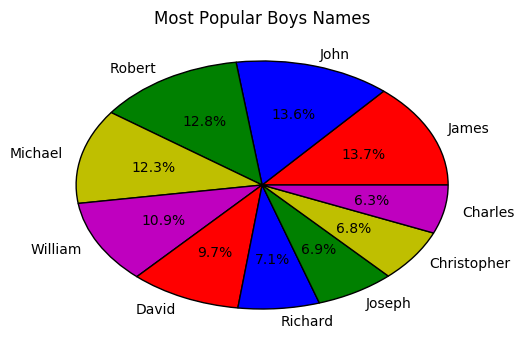

In [160]:
male_pop = [popularity['James'],popularity['John'],popularity['Robert'], popularity['Michael'], popularity['William'],popularity['David'], popularity['Richard'], popularity['Joseph'], popularity['Christopher'], popularity['Charles'] ]
labels = ['James','John', 'Robert', 'Michael', 'William', 'David', 'Richard', 'Joseph', 'Christopher', 'Charles']
title("Most Popular Boys Names")
pie(male_pop,labels = labels ,autopct='%1.1f%%', colors = ['r', 'b', 'g', 'y', 'm']);

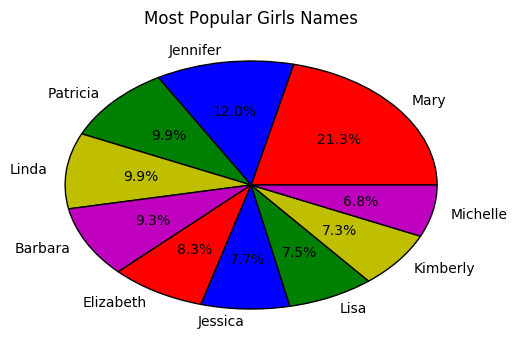

In [161]:
male_pop = [popularity['Mary'],popularity['Jennifer'],popularity['Patricia'], popularity['Linda'], popularity['Barbara'],popularity['Elizabeth'], popularity['Jessica'], popularity['Lisa'], popularity['Kimberly'], popularity['Michelle'] ]
labels = ['Mary','Jennifer', 'Patricia', 'Linda', 'Barbara', 'Elizabeth', 'Jessica', 'Lisa', 'Kimberly', 'Michelle']
title("Most Popular Girls Names")
pie(male_pop,autopct='%1.1f%%', labels = labels ,colors = ['r', 'b', 'g', 'y', 'm']);

You can see that the male names are hover around each other and seem to decrease in a predictable way. For girls however, 'Mary' is twice as popular as the next most popular name. As mentioned above, there are more common boys names then girls names, but I want to see how the top 20 names compare to the rest of the names. 

In [199]:
summ = 0
i = 0
total = 0
count = 0
for name in popularity:
    total = total + popularity[name]
    
for name in popularity:
    if count <= 20:
        summ = summ + popularity[name]
        count = count + 1
        
print("Top twenty names over total names", summ/ total)
print("Total number of names", len(data))
print("Percentage of names", 2000/96174)


Top twenty names over total names 5.2730921828e-05
Total number of names 96174
Percentage of names 0.020795641233597437


This shows that the top twenty names dont really affect the total number of names, let's go further and see if we can get anything cool

In [201]:
summ = 0
i = 0
total = 0
count = 0
for name in popularity:
    total = total + popularity[name]
    
for name in popularity:
    if count <= 100:
        summ = summ + popularity[name]
        count = count + 1
        
print("Top one hundred names over total names", summ/ total)
print("Total number of names", len(data))
print("Percentage of names", 100/96174)

Top twenty names over total names 0.00114781757354
Total number of names 96174
Percentage of names 0.0010397820616798719


We can see that the amount of people with the same name is almost proportional to the popularity of the names. Let's keep going to see if that relationship holds.

In [204]:
summ = 0
i = 0
total = 0
for name in popularity:
    total = total + popularity[name]

for name in popularity:
    while i < 8000:
        summ = summ + popularity[name]
        i = i + 1
        
print("Top eight thousand names over total names", summ/ total)
print("Total number of names", len(data))
print("Percentage of names", 8000/96174)

Top twenty names over total names 0.0199603727959
Total number of names 96174
Percentage of names 0.08318256493438975


So a little over 8% of the names make up about 2 percent of the names, Let's see if we can match them up again by adding more names.

In [203]:
summ = 0
i = 0
total = 0
count = 0
for name in popularity:
    total = total + popularity[name]
    
for name in popularity:
    if count <= 60000:
        summ = summ + popularity[name]
        count = count + 1
        
print("Top sixty thousand names over total names", summ/ total)
print("Total number of names", len(data))
print("Percentage of names", 60000/96174)

Top twenty names over total names 0.639197751331
Total number of names 96174
Percentage of names 0.6238692370079232


So they eventually meet up again. I think it's appropriate if we plot the two against each other to see the relationship.

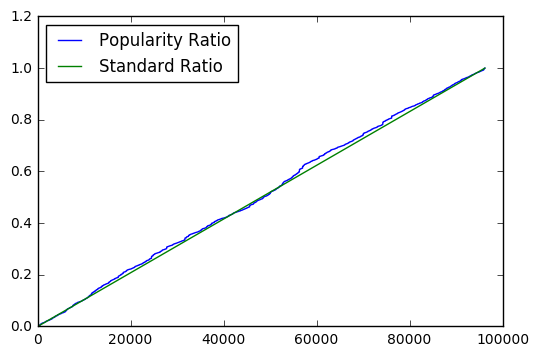

In [215]:
xspace = range(0,96174) 
ratio_list = []
standard_ratio = []
i = 1
summ_plot = 0
for name in data:
    summ_plot = summ_plot + popularity[name]
    ratio_list.append(summ_plot/total)
    standard_ratio.append(i/96174)
    i = i + 1
plot(xspace, ratio_list, xspace, standard_ratio)
legend(['Popularity Ratio', 'Standard Ratio'], loc = 0)

As we kind of saw from the brute force method, the ratio of popularity to the ratio of the amount of names in the grouping are essentially the same line. This means that the distribution of names is fairly even since even at the beginning, the two lines match up within a small deviation. This is interesting to some extend because I would have assumed that at least the top 100 to 1000 names would have had a higher ratio compared to just a ratio of the number of names used. What's even more interesting is the bump around 60000, which means that there is a pocket of somewhat uncommon names that have a consistent amount of people with those names. 

## Conclusion

When doing the analysis on the names that transitioned from predominately male to predominately female and vice versa, we saw that there were very few that went through this transition and stayed with that trajectory. The data showed that names that fluctuated between the two genders hovered around 2200 and when taking into account repeated names only around 650 were unique to each gender. In why these names transitioned is hard to tell from pure data alone and the internet wasn't really much help either. My guess is that culture is the main reason for these changes. 
    
When going over various names, most I left out due to the fact that if I didn't this report would be ten times longer, you can see a bell shaped distribution in action. It seems the popularity of a specific name raises rapidly for a few years then rapidly decreases back to either a steady flow or peters out. Other names had multiply times of popularity, others a, relatively, consitent flow or a breif moment of action but with immediate downfall. 

Finally, in the last section we saw that the popularity of a name didn't really affect the ratio of names used to total names. This seems to be unlikely since you would assume that alot of names are used frequently. Another thing to note is that when comparing the popularity of all names regardless of gender, more male heavy names were featured in the top 10, 20 and even 50. In order to get the top ten women heavy names I had to go out to around the fourty fifth position. So it seems to me that the diversity of female names is larger than that of male names. 

## Appendix A: Sources

https://www.ssa.gov/oact/babynames/limits.html - The source for all the baby name data